In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('communities.csv', na_values='?')

df.head()

,8,?,?.1,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,...,0.12.2,0.26.1,0.2.1,0.06.3,0.04.2,0.9.1,0.5.2,0.32.2,0.14.3,0.2.2
0,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.0,NaN,0.67
1,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.43
2,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.0,NaN,0.12
3,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.03
4,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.0,NaN,0.14


<AxesSubplot: >

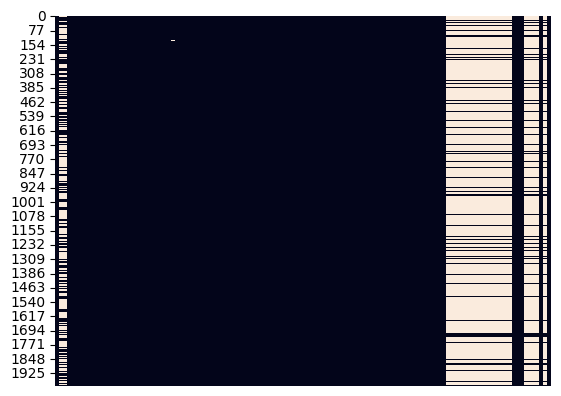

In [3]:
sns.heatmap(df.isnull(), cbar=False, xticklabels=False)

In [4]:
df.dropna(axis=1, inplace=True)

<AxesSubplot: >

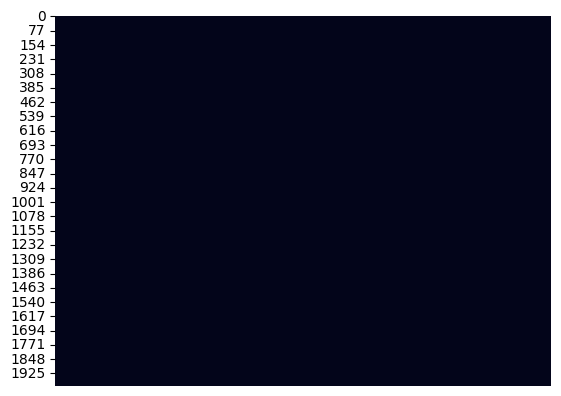

In [5]:
sns.heatmap(df.isnull(), cbar=False, xticklabels=False)

In [6]:
df.head()

,8,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,0.17,0.34,...,0.12.1,0.42,0.5.1,0.51.1,0.64,0.12.2,0.26.1,0.2.1,0.32.2,0.2.2
0,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.0,0.67
1,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.0,0.43
2,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.0,0.12
3,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.0,0.03
4,6,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,0.25,0.31,...,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.0,0.14


In [7]:
df = df[[col_name for col_name in df.columns if df[col_name].dtype in (np.int64, np.float64)]]

In [8]:
y = df.iloc[::,0]
x = df.iloc[::, 1:]

--------

###  Simple Linear regression

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [13]:
model_l = LinearRegression()
model_l.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred_l_test = model_l.predict(x_test)
y_pred_l_train = model_l.predict(x_train)

In [15]:
rmse_l_test = mean_squared_error(y_test, y_pred_l_test)
rmse_l_train = mean_squared_error(y_train, y_pred_l_train)
model_score_test = model_l.score(x_test, y_test)
model_score_train = model_l.score(x_train, y_train)

print(f'RMSE TEST: {rmse_l_test:.2f}', f'RMSE TRAIN: {rmse_l_train:.2f}',
      f'Score TEST: {model_score_test:.2f}', f'Score TRAIN: {model_score_train:.2f}', sep='\n')

RMSE TEST: 155.54
RMSE TRAIN: 136.42
Score TEST: 0.41
Score TRAIN: 0.50


---------------------

### Ridge regression L2

In [16]:
model_r = Ridge(alpha=0.1)
model_r.fit(x_train, y_train)

Ridge(alpha=0.1)

In [17]:
y_pred_r_test = model_r.predict(x_test)
y_pred_r_train = model_r.predict(x_train)

In [43]:
rmse_r_test = mean_squared_error(y_test, y_pred_r_test)
rmse_r_train = mean_squared_error(y_train, y_pred_r_train)
r_score_test = model_l.score(x_test, y_test)
r_score_train = model_l.score(x_train, y_train)

print(f'RMSE TEST: {rmse_r_test:.2f}', f'RMSE TRAIN: {rmse_r_train:.2f}',
      f'Score TEST: {r_score_test:.2f}', f'Score TRAIN: {r_score_train:.2f}', sep='\n')

print(f'Number of features: {sum(model_l.coef_ != 0)}')

RMSE TEST: 151.88
RMSE TRAIN: 137.44
Score TEST: 0.41
Score TRAIN: 0.50
Number of features: 101


### Lasso regression L1

In [32]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [33]:
y_pred_lasso_test = model_lasso.predict(x_test)
y_pred_lasso_train = model_lasso.predict(x_train)

In [44]:
rmse_r_test = mean_squared_error(y_test, y_pred_lasso_test)
rmse_r_train = mean_squared_error(y_train, y_pred_lasso_train)
r_score_test = model_lasso.score(x_test, y_test)
r_score_train = model_lasso.score(x_train, y_train)

print(f'RMSE TEST: {rmse_r_test:.2f}', f'RMSE TRAIN: {rmse_r_train:.2f}',
      f'Score TEST: {r_score_test:.2f}', f'Score TRAIN: {r_score_train:.2f}', sep='\n')
print(f'Number of features: {sum(model_lasso.coef_ != 0)}')

RMSE TEST: 157.49
RMSE TRAIN: 163.46
Score TEST: 0.40
Score TRAIN: 0.40
Number of features: 21


### Elastic Net: L1 and L2

In [38]:
model_Elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
model_Elastic.fit(x_train, y_train)

ElasticNet(alpha=0.01)

In [39]:
y_pred_e_test = model_Elastic.predict(x_test)
y_pred_e_train = model_Elastic.predict(x_train)

In [40]:
rmse_r_test = mean_squared_error(y_test, y_pred_e_test)
rmse_r_train = mean_squared_error(y_train, y_pred_e_train)
r_score_test = model_Elastic.score(x_test, y_test)
r_score_train = model_Elastic.score(x_train, y_train)

print(f'RMSE TEST: {rmse_r_test:.2f}', f'RMSE TRAIN: {rmse_r_train:.2f}',
      f'Score TEST: {r_score_test:.2f}', f'Score TRAIN: {r_score_train:.2f}', sep='\n')

RMSE TEST: 151.44
RMSE TRAIN: 152.01
Score TEST: 0.42
Score TRAIN: 0.44
